# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
#1import sweetviz as sv
#import pandas_profiling


In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')


### Выборка региона №1

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


**Пропусков и не подходящих типов данных в данных, относящихся к  региону №1, нет. Есть некоторая взяимосвязь признака f2 с целевым признаком, его оставляем. Удаляем не нужный столбец id.**

### Выборка региона №2

In [6]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


**Пропусков и не подходящих типов данных в данных, относящихся к  региону №2, нет. Есть сильная взаимосвязь признака f2 с целевым признаком. Удаляем столбец id.**

### Выборка региона №3

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


**Пропусков и не подходящих типов данных в данных, относящихся к  региону №3, нет. Есть некоторая взяимосвязь признака f2 с целевым признаком, его оставляем. Удаляем столбец id.**

**Выводы:**
* Данные готовы к исследованию.
* Из всех выборок удалены столбцы id, так как информацию нужную для исследования они не содержат.


## Обучение и проверка модели

In [13]:
def model_learning(df):
    ''' Функция делит выборку на features и target. Также делит на обучающую и валидационную выборки с соотношении 75:25
    и обучает модель линейной регрессии, выводит среднеквадратическую ошибку и средний размер запасов. 
    Возврашает объединенный датафрейм с целевым признаком и предсказанными значениями'''
    
    features = df.drop(['product', 'id'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  random_state=12345, test_size=0.25)
    model = LinearRegression().fit(features_train, target_train)

    predict_valid = pd.Series(model.predict(features_valid))

    rmse = round((mean_squared_error(target_valid, predict_valid) ** 0.5), 2)

    mean_reserve = round(predict_valid.mean(), 2)
    
    df_valid = target_valid.copy().reset_index()
    df_valid['predict'] = pd.Series(predict_valid)
    
    print('rmse региона:', rmse)
    print('Средний запас предсказанного сырья региона:', mean_reserve, 'тыс. баррелей')
    return df_valid

### Модель региона №1

In [14]:
print('Регион № 1:')
df_valid1 = model_learning(df1)
df_valid1.head()

Регион № 1:
rmse региона: 37.58
Средний запас предсказанного сырья региона: 92.59 тыс. баррелей


,index,product,predict
0,71751,10.038645,95.894952
1,80493,114.551489,77.572583
2,2655,132.603635,77.892640
3,53233,169.072125,90.175134
4,91141,122.325180,70.510088


### Модель региона №2

In [15]:
print('Регион № 2:')
df_valid2 = model_learning(df2)
df_valid2.head()

Регион № 2:
rmse региона: 0.89
Средний запас предсказанного сырья региона: 68.73 тыс. баррелей


,index,product,predict
0,71751,80.859783,82.663314
1,80493,53.906522,54.431786
2,2655,30.132364,29.748760
3,53233,53.906522,53.552133
4,91141,0.000000,1.243856


### Модель региона №3

In [16]:
print('Регион № 3:')
df_valid3 = model_learning(df3)
df_valid3.head()

Регион № 3:
rmse региона: 40.03
Средний запас предсказанного сырья региона: 94.97 тыс. баррелей


,index,product,predict
0,71751,61.212375,93.599633
1,80493,41.850118,75.105159
2,2655,57.776581,90.066809
3,53233,100.053761,105.162375
4,91141,109.897122,115.303310


**Выводы:**
*По каждому региону:*
* обучены модели всех трех регионов линейной регрессии (другие — недостаточно предсказуемые) на всех исторических данных.
* получены предсказания на валидационных выборках.
* рассчитана среднеквадратическая ошибка: у региона № 1 она самая маленькая - 37,58, а у региона № 2 самая большая - 46,01.
* вычислены средние запасы предсказанного сырья: у региона № 3 самый большой показатель - 94,95 тыс. баррелей, самый низкий у региона № 2 - 68,82.

## Подготовка к расчёту прибыли

In [17]:
# расчет стоимости разработки 1 из 200 скважин
DEVELOPMENT_COST = 10000000000 / 1000000 # избавляемся от нулей

INCOME_BARREL = 450000 / 1000000 # избавляемся от нулей

#print('Стоимость разработки 1 скважины - {:.0f} млн. рублей'.format(well_cost))
print('Стоимость разработки 200 скважин - {:.0f} млн. рублей'.format(DEVELOPMENT_COST))

Стоимость разработки 200 скважин - 10000 млн. рублей


In [18]:
#расчет достаточного объема сырья для безубыточной разработки 1 скважины
cost = DEVELOPMENT_COST / INCOME_BARREL / 200

print('Объём сырья для безубыточной разработки 1 скважины - {:.2f} тыс. баррелей'.format(cost))

Объём сырья для безубыточной разработки 1 скважины - 111.11 тыс. баррелей


**Выводы:**
* сохранены переменные со стоимостью разработки скважин в регионе (development_cost) и доход на 1 тыс.баррелей(income_barrel), округленные до млн. рублей.
* вычислен необходимый объем сырья в одной скважине для безубыточной разработки в регионе - 111,11 тыс. баррелей. Что гораздо выше средних предсказанных объемов: 
 * на 18,64 тыс.баррелей в регионе №1.
 * на 42,29 тыс баррелей в регионе №2,
 * на 16,16 тыс. баррелей в регионе №3.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безутыбточной разработки посчитано верно, с выводом согласен
    
  
</div>

## Расчёт прибыли и рисков 

In [19]:
def calculation_profit_and_loss(df, count):
    
    ''' Функция методом Bootstrap отбирает 1000 раз выборки по 500 скважин. Сортирует количество запасов по предсказанным 
    объемам сырья, отбирает 200 самых богатых скважин, рассчитывает с помощью функции income_max200 прибыль по фактическим 
    данным, формирует среднюю прибыль. Также функция рассчитывает и возвращает долю возможых убытков'''
    
    state = np.random.RandomState(12345)
    values = []
    loss = 0
    c=0
    
    for i in range(count):
        subsample = df.sample(n=500, replace=True, random_state=state)

        predict_max200 = subsample.sort_values(by='predict', ascending=False)[:200] 

        income = (predict_max200['product'].sum() * INCOME_BARREL) - DEVELOPMENT_COST
        values.append(income)
        
    values = pd.Series(values)
    profit = values.mean()

    loss = values[values<0].count() / count

    return profit, values, loss 


In [28]:
def profit_plotting(values):
    '''Построение графика разброса прибыли, полученной с помощью техники Bootstrap'''
    values.plot(kind='hist', grid=True, legend=True, bins=20)
    plt.xlabel('Средние запасы, тыс.баррелей')
    plt.ylabel('Количество скважин')
    plt.title('Распределение прибыли')
    print(values.describe())

### Регион №1

In [21]:
profit1, values1, loss1 = calculation_profit_and_loss(df_valid1, 1000)

print('Средняя прибыль с 200 скважин региона №1: {:.2f} млн. рублей'.format(profit1))
print('Вероятность убытка в регионе №1: {:.2%}'.format(loss1))

Средняя прибыль с 200 скважин региона №1: 396.16 млн. рублей
Вероятность убытка в регионе №1: 6.90%


In [22]:
print('95%-й доверительный интервал региона №1 находится между {0:.2f} и {1:.2f} млн. рублей'
      .format(values1.quantile(0.025), values1.quantile(0.975)))

95%-й доверительный интервал региона №1 находится между -111.22 и 909.77 млн. рублей


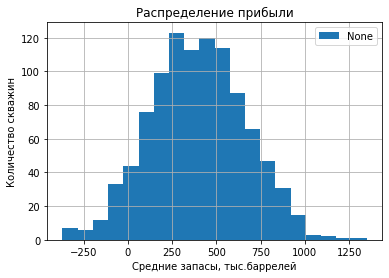

In [23]:
profit_plotting(values1)

**Средняя прибыль с 200 самых богатых скважин региона №1 составляет 396.16 млн. рублей. 
95%-й доверительный интервал региона №1 находится между -111.22 и 909.77 млн. рублей. Таким образом, в этом регионе можно получить убыток -111,22 млн. рублей или максимальную прибыль - 909,77 млн. руб.**

**Соответственно и вероятность убытка в регионе высокая - 6.9%, что делает этот регион не очень привлекательным для разработки**


### Регион №2

In [24]:
profit2, values2, loss2 = calculation_profit_and_loss(df_valid2, 1000)

print('Средняя прибыль с 200 скважин региона №2: {:.2f} млн. рублей'.format(profit2))
print('Вероятность убытка в регионе №2: {:.2%}'.format(loss2))

Средняя прибыль с 200 скважин региона №2: 456.05 млн. рублей
Вероятность убытка в регионе №2: 1.50%


In [25]:
print('95%-й доверительный интервал региона №2 находится между {0:.2f} и {1:.2f} млн. рублей'
      .format(values2.quantile(0.025), values2.quantile(0.975)))

95%-й доверительный интервал региона №2 находится между 33.82 и 852.29 млн. рублей


count    1000.000000
mean      456.045106
std       207.846627
min      -192.268109
25%       325.047903
50%       457.035949
75%       598.975968
max      1154.047279
dtype: float64


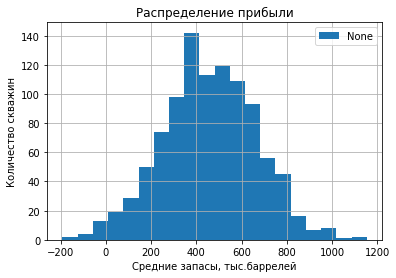

In [29]:
profit_plotting(values2)

In [ ]:
values3.info()

#plt.hist(values1)


**Средний убыток с 200 самых богатых скважин региона №2 составляет 456.05 млн. рублей. 
95%-й доверительный интервал региона №2 находится между 33.82 и 852.29 млн. рублей.**

**Вероятность убытка в регионе самая низкая - 1,5%**

### Регион №3

In [30]:
profit3, values3, loss3 = calculation_profit_and_loss(df_valid3, 1000)

print('Средняя прибыль с 200 скважин региона №3: {:.2f} млн. рублей'.format(profit3))
print('Вероятность убытка в регионе №3: {:.2%}'.format(loss3))

Средняя прибыль с 200 скважин региона №3: 404.40 млн. рублей
Вероятность убытка в регионе №3: 7.60%


In [31]:
print('95%-й доверительный интервал региона №3 находится между {0:.2f} и {1:.2f} млн. рублей'
      .format(values3.quantile(0.025), values3.quantile(0.975)))

95%-й доверительный интервал региона №3 находится между -163.35 и 950.36 млн. рублей


count    1000.000000
mean      404.403867
std       273.276207
min      -417.856954
25%       228.147198
50%       407.205811
75%       601.945398
max      1330.593219
dtype: float64


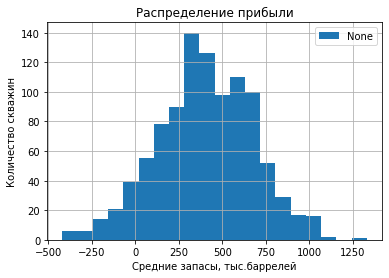

In [32]:
profit_plotting(values3)

**Средняя прибыль с 200 самых богатых скважин региона №3 составляет 404.40 млн. рублей. 
95%-й доверительный интервал региона №3 находится между -163.35 и 950.36 млн. рублей. Таким образом, здесь можно получить как убыток -163,35 млн. рублей, так и максимальную прибыль - 950,36 млн. руб.**

**Вероятность убытка в регионе самая высокая - 7.6%**

## Выводы:
* Из всех выборок удалены столбцы id, так как информацию нужную для исследования они не содержат.
* Выборки поделены на признаки и целевой признак.
* Выборки разделены на обучающую и валидационную выборки с соотношении 75:25
* обучены модели всех трех регионов линейной регрессии на всех исторических данных.
* получены предсказания на валидационных выборках.
* рассчитана среднеквадратическая ошибка: у региона № 2 она самая маленькая - 0,89, а у региона № 3 самая большая - 40,03.
* вычислены средние запасы предсказанного сырья: у региона № 3 самый большой показатель - 94,95 тыс. баррелей, самый низкий у региона № 2 - 68,82.
* вычислен необходимый объем сырья в одной скважине для безубыточной разработки в регионе - 111,11 тыс. баррелей. Что гораздо выше средних предсказанных объемов во всех трех регионах.
* с помощью техники Bootstrap с 1000 выборок найдено распределение прибыли.
* рассчитана средняя прибыль с 200 скважин, с самыми большими объемами сырья.
* определен 95%-й доверительный интервал.
* расчитан возможный уровень убытков.
* Самый перспективный регион №2, на мой взгляд, так как имеет самые лучшие показатели:
 * Средняя прибыль с 200 самых богатых скважин составляет 456.05 млн. рублей. Это хоть и не самый большой показатель, но вероятность его получить достаточно высокая. 
 * 95%-й доверительный интервал находится между 33.82 и 852.29 млн. рублей. Получение убытков не прогнозируется.
 * Вероятность убытка в регионе самая низкая - 1.5%